# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

## <span style="color:darkred">Módulo I - Dados Estruturados e Não Estruturados</span>


### <span style="color:darkred">Problemas típicos em bases de dados: Dados redundantes e desbalanceados</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

__Conteúdo:__
1. Dados Não-estruturados
2. Dados Estruturados
3. *Problemas típicos em bases de dados*
    1. Informações faltantes
    2. Pontos "fora da curva" (outliers)
    3. Informações errôneas
    4. *Dados redundantes*
    5. *Dados desbalanceados*

__Referências:__
- Salvador García, Julián Luengo, Francisco Herrera. Data Processing in Data Mining, 2015.
- Hadley Wickham, Tidy Data. Journal of Statistical Software, v.59, n.10, 2014.
- Katti Faceli; Ana Carolina Lorena; João Gama; André C.P.L.F. Carvalho. Inteligência Artificial: uma abordagem de aprendizado de máquina, 2011.

__Referência complementar:__
- PRATI, Ronaldo C.; BATISTA, Gustavo EAPA; SILVA, Diego F. Class imbalance revisited: a new experimental setup to assess the performance of treatment methods. Knowledge and Information Systems, v. 45, n. 1, p. 247-270, 2015.

***

## D. Dados redundantes

Bases de dados que contém informações repetidas ou atributos irrelevantes para obter as respostas que se espera da análise.

A redundância pode atrapalhar no projeto de modelos de aprendizado e estatísticos pois a quantidade de exemplos pode influenciar no viés do modelo.

**Redundância em bases de dados estruturadas**:

* Registros duplicados

* Atributos com valores iguais em todas as observacoes


Vamos carregar uma base de dados para mostrar exemplos

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./dados/TACTD_01-D_Redund.csv")
data

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
0,Eugenio Ewell,M,1968,USA,Christian,New Orleans,Nurse
1,Ivo Izidro,M,1988,Mexico,Christian,Acapulco,Nurse
2,Lindsey Lever,M,1965,USA,Christian,New Orleans,Nurse
3,Desiree Dardar,F,1995,USA,Christian,New Orleans,Nurse
4,Mariann Mulero,F,1973,USA,Christian,New Orleans,Nurse
...,...,...,...,...,...,...,...
95,Paityn Hale,M,1963,Peru,Christian,Arequipa,Nurse
96,Petra Cruz,F,1976,Mexico,Christian,Acapulco,Nurse
97,Margaret Keith,F,1970,USA,Christian,New Orleans,Nurse
98,Diego Colque,M,1958,Peru,Christian,Arequipa,Nurse


**Linhas/registros duplicados**

O tipo mais comum de dados redundantes são as linhas ou registros duplicados, ou seja, aquelas que possuem todos os valores de atributos iguais.

In [2]:
data[data.duplicated()]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
33,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse
51,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse
61,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse
68,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse


A consulta acima mostra apenas as linhas "extra", ou seja, as duplicadas encontradas após a ocorrência da primeira linha original.

Assim, ao consultar por um dos nomes que temos acima duplicados, veremos que há duas linhas para ele, sendo a duplicada considerada a linha 51.

In [3]:
data[data['Name']=='Carlos Cobre']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
13,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse
51,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse


Felizmente, temos uma funcão pronta para remover duplicatas de dataframes, `drop_duplicates()`, na qual podemos manter a primeira ocorrência da linha duplicada: `first`, a última: `last`, ou remover todas as que aparecem duplicadas: `False`.

In [9]:
d_ndup = data.drop_duplicates(keep='first')
d_ndup[d_ndup['Name']=='Carlos Cobre']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
13,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse


In [10]:
d_ndup[d_ndup['Name']=='Ricardo Rima']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
18,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse


---

**Atributos duplicados**

Nesse caso temos redundância de um dos atributos, o que pode não representar um problema.

In [11]:
d_ndup[d_ndup.duplicated(['Name'])]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
93,Apolonia Abler,F,1967,Australia,Christian,Brisbane,Nurse


In [12]:
d_ndup[d_ndup['Name']=='Apolonia Abler']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
19,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse
93,Apolonia Abler,F,1967,Australia,Christian,Brisbane,Nurse


Notamos que, apesar de ter o mesmo nome, sexo e ano de nascimento, as duas pessoas nasceram em países diferentes e portanto não há redundância ou dados duplicados a remover.

---
**Atributos irrelevantes**

Investigando os atributos Profession e Religion, mostrando seus histogramas, notamos que todas as linhas tem o mesmo valor para esses atributos.

Apesar do valor informativo, ao construir modelos computacionais, por exemplo classificadores, esses atributos representam um aumento na dimensionalidade sem contribuir para a tarefa principal, classificação.

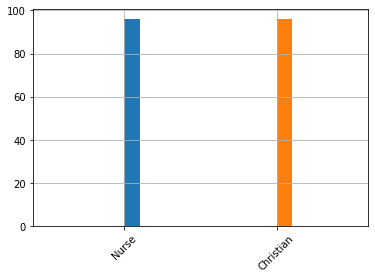

In [15]:
d_ndup['Profession'].hist(xrot=45)
d_ndup['Religion'].hist(xrot=45)


**Redundância em dados não-estruturados**

Muito comum pois os dados binários ou textuais possuem diversos elementos repetidos, que poderiam ser agrupados ou então desconsiderados. Exemplos incluem:

- o fundo de imagens e documentos

- timbre em documentos e cartas

- tipos de palavras em textos: artigos, conjunções, etc.


## E. Dados Desbalanceados

Vamos estudar o problema de dados desbalanceados utilizando o conjunto de dados de natalidade em uma maternidade.

Num histograma mostrado anteriormente para o sexo dos bebês, vimos que a base de dados possui uma contagem muito mais alta do sexo Feminino do que do sexo Masculino.

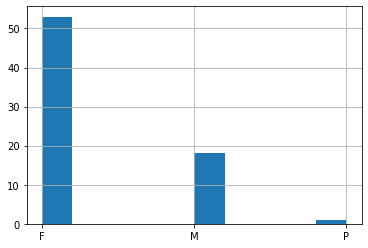

In [16]:
data = pd.read_csv("./dados/TACTD_01-BCE_Outliers_Err_Desbal.csv")

data['Sex'].hist()

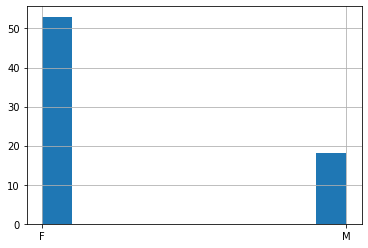

In [17]:
data.loc[data['Sex'] == 'P', 'Sex'] = np.nan
data['Sex'].hist()

In [18]:
data[data['Sex'].isnull()]

,Sex,Weight,Gestational age,Month,Year
16,NaN,3600,36,1,2017


Calculando o desbalanceamento nesse atributo:

In [19]:
data['Sex'].describe()

count     71
unique     2
top        F
freq      53
Name: Sex, dtype: object

In [20]:
prop_F = data['Sex'].describe()['freq']/data['Sex'].describe()['count']
print("%.2f%%" % (prop_F*100))

74.65%


Nesse caso temos um desbalanceamento de aproximadamente 1:3

Ao inferir modelos temos que tratar a amostra relativa ao Sexo Feminino e ao Sexo Masculino de forma a controlar por essa diferença.

Em alguns métodos de aprendizado, por exemplo, a quantidade de dados é levada em consideração e pode trazer um peso maior para a categoria chamada de *majoritária*, nesse caso o sexo Feminino.

---